In [1]:
# !pip install torchcfm x-transformers
# !pip install opencv-python
# !pip3 install --pre torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/nightly/cpu -U


In [1]:
import sys
import os
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from torchdyn.core import NeuralODE
from tqdm import tqdm

# G, face_w, device = setup_stylegan()

sys.path.append('/Users/adamsobieszek/PycharmProjects/psychGAN/content/psychGAN/stylegan3')
device = torch.device('mps')
with open('/Users/adamsobieszek/PycharmProjects/psychGAN/stylegan2-ffhq-1024x1024.pkl', 'rb') as fp:
    G = pickle.load(fp)['G_ema'].to(device)

# Compute the average latent vector
all_z = torch.randn([1, G.mapping.z_dim], device=device)
face_w = G.mapping(all_z, None, truncation_psi=0.5)
# show(face_w)

In [2]:

# G, face_w, device = setup_stylegan()

sys.path.append('/Users/adamsobieszek/PycharmProjects/psychGAN/content/psychGAN/stylegan3')
device = torch.device('mps')
with open('/Users/adamsobieszek/PycharmProjects/psychGAN/stylegan2-ffhq-1024x1024.pkl', 'rb') as fp:
    G = pickle.load(fp)['G_ema'].to(device)

# Compute the average latent vector
all_z = torch.randn([1, G.mapping.z_dim], device=device)
face_w = G.mapping(all_z, None, truncation_psi=0.5)
# show(face_w)

In [3]:
#@title init
import pickle
import torch
import torch.nn.functional as F
import sys
import shutil
import torchvision.transforms.functional as TF
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
import csv
import numpy as np
import pandas as pd
import PIL.Image
from PIL import Image, ImageDraw
import IPython.display
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
from ipywidgets import interact, Button, FloatSlider, Layout

import sys

import io
import os, time
import pickle
import shutil
import numpy as np
import torch
import torch.nn.functional as F
import requests
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
import copy
import unicodedata
import re
from PIL import Image
from tqdm.notebook import tqdm
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from IPython.display import display
from einops import rearrange
from time import perf_counter

from dnnlib.util import open_url

df = pd.read_csv('/Users/adamsobieszek/PycharmProjects/psychGAN/content/coords_wlosses.csv')
df["dlatents"] = df["dlatents"].apply(eval)
df

,Unnamed: 0,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,...,native,black,white,looks-like-you,gay,electable,godly,outdoors,dlatents,loss
0,0,1,43.673077,46.552632,79.771429,55.405405,50.404255,86.891892,38.119048,66.736842,...,13.925926,5.105263,92.970588,31.428571,20.523810,61.486486,53.439024,83.925000,"[-0.34055513, -1.9114306, -0.2459186, 0.119695...",0.170817
1,1,2,65.000000,59.750000,48.666667,57.891892,31.300000,12.560976,48.275000,49.209302,...,54.564516,72.735294,4.880952,13.465116,31.414634,66.184211,62.809524,57.513514,"[-0.77707213, -1.450018, 0.03675404, 0.2841083...",0.166311
2,2,3,37.010526,36.000000,65.428571,65.057143,51.745098,74.789474,44.790698,48.666667,...,33.898305,3.972222,68.787879,18.363636,46.024390,70.804878,55.921053,11.292683,"[-0.5631943, -0.4127729, 2.1988897, 0.5081659,...",0.142555
3,3,4,64.053191,65.500000,47.194444,54.700000,24.777778,9.526316,32.375000,44.024390,...,49.824561,72.552632,3.315789,10.500000,20.365854,57.179487,62.051282,16.560976,"[-0.9139883, 1.6725628, 0.964052, 1.1866649, -...",0.194268
4,4,5,69.577320,50.702703,56.257143,61.527778,44.534884,14.650000,40.250000,70.184211,...,10.910714,3.702703,88.842105,19.000000,21.783784,70.888889,71.833333,20.777778,"[-1.2948744, -1.5081217, -1.0790169, -0.883098...",0.183126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,999,1000,51.678161,45.970588,59.171429,51.925000,40.142857,86.257143,53.235294,73.714286,...,19.256410,6.647059,81.857143,26.371429,29.055556,57.975000,60.757576,14.923077,"[-0.14424458, 0.5183627, -0.17587073, 0.384992...",0.211044
1000,1000,1001,76.918605,66.928571,37.105263,53.864865,16.294118,11.200000,44.138889,57.228571,...,45.717949,10.289474,58.500000,23.085714,18.783784,27.243902,68.800000,87.636364,"[0.66468793, -0.426184, 1.5559996, -0.3777003,...",0.132792
1001,1001,1002,50.318182,44.902439,63.578947,64.736842,37.969697,82.297297,51.333333,52.891892,...,60.200000,18.500000,13.351351,16.515152,24.378378,63.871795,49.900000,12.914286,"[-0.2239002, 0.0008723813, 0.67230093, -0.1520...",0.108586
1002,1002,1003,55.551724,69.842105,54.625000,48.250000,26.029412,8.307692,41.358974,54.085714,...,44.375000,11.685714,47.027027,22.230769,25.400000,56.852941,63.435897,17.714286,"[0.16991338, 0.4349591, 0.07480586, -0.3928165...",0.133602


In [4]:
# %cd /Users/adamsobieszek/PycharmProjects/psychGAN/content
from manipy.models.layers import EnsembleRegressor, MeanRegressor

final_models_path = "/Users/adamsobieszek/PycharmProjects/psychGAN/content/"

# del control_models
if not "control_models" in dir():
  # if not os.path.exists("final_models.zip"):
  #   !gdown 1pPjOd-mx-d-vOw1QR_lpJoJmLAGdkI3W
  #   !unzip final_models.zip
  #   !unzip final_models.zip
  control_names = ['happy', 'gender', 'age']
  control_models = [EnsembleRegressor([MeanRegressor(512,1) for _ in range(8)]).to(device) for label in control_names]
  for m,l in zip(control_models,control_names):
    m.load_state_dict(torch.load(f"{final_models_path}/final_models/ensemble_{l}.pt", map_location=torch.device("mps")))
    m.eval()


# Fit Beta

In [5]:
import numpy as np
from scipy.stats import beta


means = pd.read_csv('omi/attribute_means.csv')
data = pd.read_csv('omi/attribute_ratings.csv')
data = data.loc[data.stimulus <=1004]
data = data.loc[(data.attribute == 'trustworthy')]
selected_stimuli = means.loc[means.age>0].stimulus
data = data.loc[[i in selected_stimuli for i in data.stimulus]]
data.loc[:,"rating"] = (data["rating"]+0.5)/101
grouped_ratings = data.groupby('stimulus')['rating'].apply(list)
max_len = int(grouped_ratings.apply(len).max()*1.5)
X = np.stack(df.loc[[i in selected_stimuli for i in df.stimulus],'dlatents'].values)
# grouped_ratings.apply(len).hist()
# ratings = grouped_ratings.apply(lambda l: l[:max_len]+[torch.nan]*(max_len-len(l[:max_len])))
# ratings = torch.tensor(ratings.to_list(), device=device)
# alphabet = grouped_ratings.apply(estimate_beta_parameters)
# locdist = alphabet.apply(lambda ab: (ab[0]/(ab[0]+ab[1]),(ab[0]+ab[1])))
# a,b = [*zip(*grouped_ratings.apply(estimate_beta_parameters).to_list())]
# grouped_ratings.apply(estimate_beta_parameters)


/var/folders/nc/zbqbbkkx08z7v1g3mlf8bdn00000gn/T/ipykernel_13660/859162665.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.64851485 0.5        0.62871287 ... 0.74752475 0.23267327 0.18316832]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:,"rating"] = (data["rating"]+0.5)/101


In [6]:
# images = G.synthesis(face_w).cpu()
#
# transform = Compose([
#     Resize(512),
#     lambda x: torch.clamp((x + 1) / 2, min=0, max=1)
# ])
# images_pil = [TF.to_pil_image(transform(im)) for im in images]
#
# display_images(images_pil, True, 1,labels=None)

# Train

### Helper funcs

In [7]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn
from torch.utils.data import DataLoader


# Exclude 'Unnamed: 0', 'stimulus', and 'loss' from target variables
target_columns = [col for col in df.columns if col not in ['Unnamed: 0', 'stimulus', 'loss', 'dlatents']]

# Data Preparation
w_avg = G.mapping.w_avg

# Device Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'mps')

import numpy as np
from scipy.stats import pearsonr
import torch
torch.cuda.empty_cache()
# Train models for each target column
df
# best_models, accuracies = train_models(X, ["trustworthy"], epochs = 250, batch_size=64)

,Unnamed: 0,stimulus,trustworthy,attractive,dominant,smart,age,gender,weight,typical,...,native,black,white,looks-like-you,gay,electable,godly,outdoors,dlatents,loss
0,0,1,43.673077,46.552632,79.771429,55.405405,50.404255,86.891892,38.119048,66.736842,...,13.925926,5.105263,92.970588,31.428571,20.523810,61.486486,53.439024,83.925000,"[-0.34055513, -1.9114306, -0.2459186, 0.119695...",0.170817
1,1,2,65.000000,59.750000,48.666667,57.891892,31.300000,12.560976,48.275000,49.209302,...,54.564516,72.735294,4.880952,13.465116,31.414634,66.184211,62.809524,57.513514,"[-0.77707213, -1.450018, 0.03675404, 0.2841083...",0.166311
2,2,3,37.010526,36.000000,65.428571,65.057143,51.745098,74.789474,44.790698,48.666667,...,33.898305,3.972222,68.787879,18.363636,46.024390,70.804878,55.921053,11.292683,"[-0.5631943, -0.4127729, 2.1988897, 0.5081659,...",0.142555
3,3,4,64.053191,65.500000,47.194444,54.700000,24.777778,9.526316,32.375000,44.024390,...,49.824561,72.552632,3.315789,10.500000,20.365854,57.179487,62.051282,16.560976,"[-0.9139883, 1.6725628, 0.964052, 1.1866649, -...",0.194268
4,4,5,69.577320,50.702703,56.257143,61.527778,44.534884,14.650000,40.250000,70.184211,...,10.910714,3.702703,88.842105,19.000000,21.783784,70.888889,71.833333,20.777778,"[-1.2948744, -1.5081217, -1.0790169, -0.883098...",0.183126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,999,1000,51.678161,45.970588,59.171429,51.925000,40.142857,86.257143,53.235294,73.714286,...,19.256410,6.647059,81.857143,26.371429,29.055556,57.975000,60.757576,14.923077,"[-0.14424458, 0.5183627, -0.17587073, 0.384992...",0.211044
1000,1000,1001,76.918605,66.928571,37.105263,53.864865,16.294118,11.200000,44.138889,57.228571,...,45.717949,10.289474,58.500000,23.085714,18.783784,27.243902,68.800000,87.636364,"[0.66468793, -0.426184, 1.5559996, -0.3777003,...",0.132792
1001,1001,1002,50.318182,44.902439,63.578947,64.736842,37.969697,82.297297,51.333333,52.891892,...,60.200000,18.500000,13.351351,16.515152,24.378378,63.871795,49.900000,12.914286,"[-0.2239002, 0.0008723813, 0.67230093, -0.1520...",0.108586
1002,1002,1003,55.551724,69.842105,54.625000,48.250000,26.029412,8.307692,41.358974,54.085714,...,44.375000,11.685714,47.027027,22.230769,25.400000,56.852941,63.435897,17.714286,"[0.16991338, 0.4349591, 0.07480586, -0.3928165...",0.133602


# Flow

In [8]:
import locale

locale.getpreferredencoding = lambda: "UTF-8"
def sample_conditional_pt(x0, x1, t, sigma):
    t = t.reshape(-1, *([1] * (x0.dim() - 1)))
    mu_t = t * x1 + (1 - t) * x0
    epsilon = torch.randn_like(x0)
    return mu_t + sigma * epsilon
def compute_conditional_vector_field(x0, x1):
    return x1 - x0

import math
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import ot as pot
import torch
import torchdyn
from torchdyn.core import NeuralODE
from torchdyn.datasets import generate_moons

from torchcfm.conditional_flow_matching import *
from torchcfm.models.models import *
from torchcfm.utils import *

from manipy.models.flow_models import VectorFieldTransformer, RatingODE
from manipy.models.layers import EnsembleRegressor, MeanRegressor, AlphaBetaRegressor

from manipy.utils.stylegan_utils import sample_w


In [9]:

class RatingODE(nn.Module):
    def __init__(self, flow, rating_model, reverse = False):
        super().__init__()
        self.flow = flow
        self.rating_model = rating_model
        self.history = []
        self.reverse = reverse

    def forward(self, x):
        with torch.no_grad():
            x = x[:,:512]
            r = self.rating_model(x)
            r = torch.logit(r[:,:1]/(r[:,:1]+r[:,1:]))
            # self.history.append(r.cpu())
        return self.flow(x,r)*(-1 if self.reverse else 1)

In [10]:
#@title Interactive view
import numpy as np
import torch
from pathlib import Path
from torchvision.transforms import Compose, Resize
import torchvision.transforms.functional as TF
import matplotlib.pyplot as plt
from scipy.stats import beta



dim = "trustworthy"

models = [AlphaBetaRegressor(dim=512).to(device) for i in range(8)]
for i,m in enumerate([torch.load(f"/Users/adamsobieszek/PycharmProjects/psychGAN/best_models/{mm}",map_location=device) for mm in [f"model_{dim}_v{3+i}.pt" for i in range(8)]]):
    models[i].load_state_dict(m)
    models[i].eval()
model = EnsembleRegressor(models)

flow = VectorFieldTransformer(
    rating_model=model,
    dim=512,
    depth=8,
    num_heads=8,
    dim_head=48,
    num_registers=32,
    dropout=0.15,
    add_rating_gradient=True,
    use_rotary=True
).to(device)
flow.eval()
checkpoint_path =  '/Users/adamsobieszek/PycharmProjects/psychGAN/trustworthy_final_final_final.pt'
flow.load_state_dict(torch.load(checkpoint_path,map_location=device))

_flow = RatingODE(flow,model)
node = NeuralODE(
    torch_wrapper(_flow), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4
)
# #
with torch.no_grad():
    i_w=0
    traj = None
    face_w = sample_w(20,1)
    traj_all = node.trajectory(
        face_w,
        t_span=torch.linspace(0, 15, 20),
      )

Loading StyleGAN model from /Users/adamsobieszek/PycharmProjects/psychGAN/stylegan2-ffhq-1024x1024.pkl to mps...
StyleGAN model and w_avg loaded.


In [11]:
import torch
import numpy as np
import pandas as pd
from pathlib import Path
from torchvision.transforms import Compose, Resize
import torchvision.transforms.functional as TF
from typing import List, Dict, Union, Tuple

# Assuming the existence of these from a library like torchdyn
from torchdyn.core import NeuralODE
from torchdyn.datasets import *
from torchdyn.models import *


class StyleGANFlowBackend:
    def __init__(self,
                 generator: torch.nn.Module,
                 flow_models: Dict[str, torch.nn.Module],
                 regression_models: Dict[str, torch.nn.Module],
                 trait_stats_df: pd.DataFrame):
        """
        Initializes the StyleGANFlowBackend for flow-based manipulations.
        """
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu')
        print(f"✅ StyleGANFlowBackend initialized on device: {self.device}")

        self.G = generator.to(self.device).eval()
        self.flow_models = {k: m.to(self.device).eval() for k, m in flow_models.items()}
        self.models = {k: m.to(self.device).eval() for k, m in regression_models.items()}
        self.dimension_names = [*self.flow_models.keys()]
        self.df = trait_stats_df
        self.m, self.std = trait_stats_df[self.dimension_names].mean(), trait_stats_df[self.dimension_names].std()

    def to_w(self, target: Union[str, Path, np.ndarray, torch.Tensor]) -> torch.Tensor:
        # ... (same as before) ...
        if isinstance(target, (str, Path)):
            target = np.load(target) if ".npy" in str(target) else torch.load(target)
        if isinstance(target, np.ndarray):
            target = torch.tensor(target, dtype=torch.float32, device=self.device)
        if target.dim() < 2: target = target.reshape(1, 1, 512)
        if target.dim() == 2: target = target.unsqueeze(0)
        if target.shape[1] == 1: target = target.repeat(1, 18, 1)
        return target.to(self.device).reshape(-1, 18, 512)

    def _get_adaptive_steps(self, min_steps: int, num_levels: int) -> int:
        """Calculates the optimal number of steps for the trajectory."""
        if num_levels == 0:
            return min_steps
        # Ensure we have at least min_steps
        num_steps = max(min_steps, num_levels)
        # If not perfectly divisible, find the next multiple of num_levels
        if num_steps % num_levels != 0:
            num_steps = ((num_steps // num_levels) + 1) * num_levels
        return num_steps

    def _calculate_efficient_trajectory(self,
                                        target_dim: str,
                                        strengths_in_direction: List[float],
                                        initial_w_for_flow: torch.Tensor,
                                        min_steps: int,
                                        is_forward: bool) -> Dict[float, torch.Tensor]:
        """
        Calculates one trajectory and samples all required points from it.
        """
        if not strengths_in_direction:
            return {}

        # 1. Determine trajectory parameters
        max_strength = max(abs(s) for s in strengths_in_direction)
        num_levels = len(strengths_in_direction)
        num_steps = self._get_adaptive_steps(min_steps, num_levels)
        t_span = torch.linspace(0, max_strength, num_steps, device=self.device)

        # 2. Set up the ODE solver for this specific trajectory
        flow_field = self.flow_models[target_dim]
        rating_model = self.models[target_dim]
        # The NeuralODE solver needs to be re-initialized for correct direction
        ode_func = RatingODE(flow_field, rating_model, reverse=not is_forward)
        node = NeuralODE(ode_func, solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4)

        # 3. Compute the single, full trajectory
        print(f"🚀 Computing {'forward' if is_forward else 'backward'} trajectory for '{target_dim}' with {num_steps} steps to strength {max_strength:.2f}...")
        full_trajectory = node.trajectory(initial_w_for_flow, t_span)

        # 4. Sample the required points from the trajectory
        results = {}
        for s in strengths_in_direction:
            # Find the index in the trajectory corresponding to this strength
            s_abs = abs(s)
            idx = round((s_abs / max_strength) * (num_steps - 1)) if max_strength > 0 else 0
            results[s] = full_trajectory[int(idx)]
        return results

    @torch.no_grad()
    def __call__(self,
                 manipulated_dimensions: List[str],
                 strengths: List[float] = [1.0],
                 num_faces: int = 1,
                 steps: int = 10,
                 latents_from: int = 0,
                 latents_to: int = 18,
                 preserve_identity: bool = True,
                 truncation_psi: float = 0.55,
                 max_batch_size: int = 4,
                 return_coords: bool = False,
                 return_metadata: bool = False,
                 w: torch.Tensor = None,
                 **kwargs) -> Union[Tuple, Tuple[List, List, torch.Tensor], Tuple[List, List, torch.Tensor, Dict]]:

        # --- 1. Initial Setup ---
        def to_pil(images):
            tf = Compose([Resize(512), lambda x: torch.clamp((x + 1) / 2, 0, 1)])
            return [TF.to_pil_image(img) for img in tf(images)]
        
        def predict_ratings(w_tensor):
            w0 = w_tensor[:, 0, :]
            return {label: model(w0).cpu() for label, model in self.models.items()}

        if num_faces > 1:
            # The efficient calculation logic assumes all manipulations apply to the same set of faces.
            print("⚠️ Warning: Efficient trajectory calculation is optimized for `num_faces=1`. Running for multiple faces may have unintended effects if they diverge significantly.")

        face_w = self.to_w(w) if w is not None else self.G.mapping(torch.randn([num_faces, self.G.z_dim], device=self.device), None, truncation_psi=truncation_psi)
        w_for_flow = face_w[:, 0, :]

        # --- 2. Efficiently Compute All Manipulations ---
        all_manipulated_w0 = {}
        target_dim = manipulated_dimensions[0] # Assuming one dimension for now

        unique_strengths = sorted(list(set(strengths)))
        pos_strengths = [s for s in unique_strengths if s >= 0]
        neg_strengths = [s for s in unique_strengths if s < 0]

        # Handle positive and zero strengths
        if pos_strengths:
            pos_results = self._calculate_efficient_trajectory(target_dim, pos_strengths, w_for_flow, steps, is_forward=True)
            all_manipulated_w0.update(pos_results)

        # Handle negative strengths
        if neg_strengths:
            neg_results = self._calculate_efficient_trajectory(target_dim, neg_strengths, w_for_flow, steps, is_forward=False)
            all_manipulated_w0.update(neg_results)

        # --- 3. Assemble Final Results ---
        images_pil = to_pil(self.G.synthesis(face_w).cpu())
        labels = [f"{i}_original" for i in range(num_faces)]
        coords = face_w.clone()
        metadata = {"initial_ratings": [], "final_ratings": [], "manipulation": [], "distance": []}
        initial_ratings = predict_ratings(face_w)

        print(" assembling final images...")
        for strength in unique_strengths:
            if strength == 0: continue # The original is already included
            
            w0 = all_manipulated_w0[strength]
            manipulated_w_final = face_w.clone()
            manipulated_w_final[:, :, :] = w0.unsqueeze(1)

            if preserve_identity:
                style_layers = range(latents_from, latents_to, 2)
                manipulated_w_final[:, style_layers, :] = face_w[:, style_layers, :]
            
            images_pil.extend(to_pil(self.G.synthesis(manipulated_w_final).cpu()))
            coords = torch.cat((coords, manipulated_w_final))
            
            name = f"{target_dim}_{strength:+.2f}"
            labels.extend([f"{i}_{name}" for i in range(num_faces)])
            
            if return_metadata:
                metadata["initial_ratings"].append({k: v.numpy() for k, v in initial_ratings.items()})
                metadata["final_ratings"].append({k: v.numpy() for k, v in predict_ratings(manipulated_w_final).items()})
                metadata["manipulation"].append(name)
                metadata["distance"].append(torch.norm(manipulated_w_final[:, 0, :] - face_w[:, 0, :], dim=-1).cpu().numpy())

        # --- 4. Format Output ---
        output = (images_pil, labels)
        if return_coords: output += (coords.cpu(),)
        if return_metadata: output += (metadata,)
        
        return output
#
backend = StyleGANFlowBackend(
    generator=G,
    flow_models={"trustworthy": flow},
    regression_models={"trustworthy": model}|dict([(l,m) for l,m in zip(control_names,control_models)]), # Can now have multiple named models
    trait_stats_df=df
)
backend

✅ StyleGANFlowBackend initialized on device: mps


In [14]:

# This is the config the frontend would send as JSON
input_config = {
    "mode": "shape",
    "manipulated_dimensions": [{
        "name": "trustworthy",
        "strength": 10.0,
        "n_levels": 5 # Generates 5 images from -10 to +10 strength
    }],
    "max_steps": 5,
    "num_faces": 1,
    "return_coords": True,
    "return_metadata": True,
    "preserve_identity": True
}

print("--- 1. Simulating frontend JSON config ---")
print(input_config)

# This logic mimics your `parse_config` function
backend_kwargs = input_config.copy()
latents_from, latents_to = {"both": (0,18), "color": (9,18), "shape":(0,9)}[backend_kwargs.pop("mode", "both")]
dim1 = backend_kwargs["manipulated_dimensions"][0]
backend_kwargs["manipulated_dimensions"] = [dim1["name"]]
# Note: np.linspace includes start and end points
backend_kwargs["strengths"] = [*np.linspace(-1*dim1["strength"], dim1["strength"], dim1["n_levels"])]
backend_kwargs["steps"] = backend_kwargs.pop("max_steps", 5)
backend_kwargs["latents_from"] = latents_from
backend_kwargs["latents_to"] = latents_to

print("\n--- 2. Processing config into backend arguments ---")
# This dictionary is what's passed to the backend
print(backend_kwargs)

# --- 4. The Final Call to the Backend ---
images_pil, labels, coords, metadata = backend(**backend_kwargs)

print("\n--- 3. Backend returned ---")
print(f"Number of images: {len(images_pil)}")
print(f"Labels: {labels}")

from manipy.stylegan.utils import show_faces
show_faces(images_pil, rows=1)

--- 1. Simulating frontend JSON config ---
{'mode': 'shape', 'manipulated_dimensions': [{'name': 'trustworthy', 'strength': 10.0, 'n_levels': 5}], 'max_steps': 5, 'num_faces': 1, 'return_coords': True, 'return_metadata': True, 'preserve_identity': True}

--- 2. Processing config into backend arguments ---
{'manipulated_dimensions': ['trustworthy'], 'num_faces': 1, 'return_coords': True, 'return_metadata': True, 'preserve_identity': True, 'strengths': [-10.0, -5.0, 0.0, 5.0, 10.0], 'steps': 5, 'latents_from': 0, 'latents_to': 9}
Your vector field callable (nn.Module) should have both time `t` and state `x` as arguments, we've wrapped it for you.
🚀 Computing forward trajectory for 'trustworthy' with 6 steps to strength 10.00...
Your vector field callable (nn.Module) should have both time `t` and state `x` as arguments, we've wrapped it for you.
🚀 Computing backward trajectory for 'trustworthy' with 6 steps to strength 10.00...


TypeError: forward() got an unexpected keyword argument 'output'

In [15]:
labels

NameError: name 'labels' is not defined

In [13]:


models = [AlphaBetaRegressor(dim=512).to(device) for i in range(8)]
for i,m in enumerate([torch.load(f"/Users/adamsobieszek/PycharmProjects/psychGAN/best_models/{mm}",map_location=device) for mm in [f"model_{dim}_v{3+i}.pt" for i in range(8)]]):
    models[i].load_state_dict(m)
    models[i].eval()
model = EnsembleRegressor(models)

flow = VectorFieldTransformer(
    dim=512,
    depth=8,
    num_heads=8,
    dim_head=48,
    num_registers=32,
    dropout=0.15,
    with_gradient=True,
    project = False
).to(device)
flow.eval()
checkpoint_path =  '/Users/adamsobieszek/PycharmProjects/psychGAN/trustworthy_final_final_final.pt'#'/Users/adamsobieszek/PycharmProjects/psychGAN/trustworthy_1739291448.9982264_epoch_314.pt'  #'/Users/adamsobieszek/PycharmProjects/psychGAN/best_nogradient_flow.pt'
flow.load_state_dict(torch.load(checkpoint_path,map_location=device))


_flow = RatingODE(flow,model)
node = NeuralODE(
  torch_wrapper(_flow), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4
)

flow2 = VectorFieldTransformer(
    dim=512,
    depth=8,
    num_heads=8,
    dim_head=48,
    num_registers=32,
    dropout=0.15,
    with_gradient=True
).to(device)
flow2.eval()
checkpoint_path = '/Users/adamsobieszek/PycharmProjects/psychGAN/best_model_1739077906.859061_epoch_229.pt'
flow2.load_state_dict(torch.load(checkpoint_path,map_location=device))


_flow2 = RatingODE(flow2,model_simple)
node2 = NeuralODE(
  torch_wrapper(_flow2), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4
)

p = "Peterson valence/latents/"
directions = dict([(m,torch.from_numpy(np.load((p+m+"_direction.npy"))).float().to(device)) for m in ["trustworthy","attractive","smart"]])

class Diff(nn.Module):
    def __init__(self, a, b):
        super(Diff, self).__init__()
        self.a = a
        self.b = b

    def forward(self, x,r):
        v = self.b(x,r) - self.a(x,r)
        return v/v.norm(dim=-1,keepdim=True)



# _flow3 = RatingODE(Diff(                              flow,flow2),model)
# node3 = NeuralODE(
#   torch_wrapper(_flow3), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4
# )

# traj2, traj_all2 = None

TypeError: __init__() got an unexpected keyword argument 'with_gradient'

In [ ]:
@torch.no_grad()
def manipulation_showcase(coeff_vec,coeff_flow):
    try:
        truncation_psi = 1.0
        Shape_or_color='Both'
        global G, model, device, directions
        latents_from, latents_to = (0, 10) if Shape_or_color == 'Shape' else (0, 18) if Shape_or_color == 'Both' else (9, 18)

        w_avg = G.mapping.w_avg
        original_face_w = face_w.clone()

        # Flow manipulation (same as original)
        flow_w = traj[int(coeff_flow)].clone()
        flow_manipulated_w = torch.stack([flow_w] * 18, dim=1)

        # Flow 2
        vector_manipulated_w = torch.stack([traj2[int(coeff_flow)].clone()] * 18, dim=1)

        # Calculate vector manipulation
        # direction = directions[dim].to(device)
        # with torch.enable_grad():
        #     age_grad = grad(direction.view(1,-1), control_models[2])
        # direction = direction - torch.dot(age_grad.view(-1)/age_grad.norm(),direction.view(-1))*age_grad/age_grad.norm()
        # vector_direction = -1*direction/direction.norm()*(original_face_w[:, 0] - flow_w).norm()*coeff_vec
        # vector_manipulated_w = torch.stack([original_face_w[:, 0] + vector_direction] * 18, dim=1)

        if Shape_or_color == "Shape":
            # vector_manipulated_w[:, 0:18:2] = (vector_manipulated_w[:, 0:18:2] + original_face_w[:, 0:18:2]) / 2
            flow_manipulated_w[:, 0:18:2] = (flow_manipulated_w[:, 0:18:2] + original_face_w[:, 0:18:2]) / 2

        vector_manipulated_w = original_face_w.clone()
        # Stack all w vectors
        stacked_w = torch.stack([vector_manipulated_w, original_face_w, flow_manipulated_w])

        # Generate all images at once
        images = G.synthesis(stacked_w.view(3, 18, -1)).cpu()
        tf = Compose([
            Resize(512),
            lambda x: torch.clamp((x+1)/2, min=0, max=1),
        ])

        # Convert to PIL images
        image_pil_vector = TF.to_pil_image(tf(images[0]))
        image_pil_original = TF.to_pil_image(tf(images[1]))
        image_pil_flow = TF.to_pil_image(tf(images[2]))

        # Calculate ratings
        mean_vector,mean_original,mean_flow = model(stacked_w[:, 0, 0],output = 'mean').cpu().numpy().flatten()
        amean_vector,amean_original,amean_flow = control_models[2](stacked_w[:, 0, 0]).cpu().numpy().flatten()


        # Create figure
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))
        distance = f"\nDistance: {(original_face_w[:, 0] - flow_w).norm():.2f}"
        distance_vec = f"\nDistance: {(original_face_w[:, 0] - flow_w).norm()*coeff_vec:.2f}"
        # Plot 1: Vector manipulation
        ax1.imshow(image_pil_vector)
        ax1.set_title("Vec Manipulation")
        ax1.text(0.5, 0.95, f'ΔRating: {(mean_vector - mean_original)*100:.2f}\nΔAge: {(amean_vector - amean_original):.2f}'+distance_vec,
                 horizontalalignment='center', verticalalignment='center',
                 transform=ax1.transAxes, color='white', fontsize=12,
                 bbox=dict(facecolor='black', alpha=0.7))
        ax1.axis('off')

        # Plot 2: Original image
        ax2.imshow(image_pil_original)
        ax2.set_title("Original Image")
        ax2.text(0.5, 0.95, f'Rating: {mean_original*100:.2f}\nAge: {(amean_original):.2f}',
                 horizontalalignment='center', verticalalignment='center',
                 transform=ax2.transAxes, color='white', fontsize=12,
                 bbox=dict(facecolor='black', alpha=0.7))
        ax2.axis('off')

        # Plot 3: Flow manipulation
        ax3.imshow(image_pil_flow)
        ax3.set_title("New Flow Manipulation")
        ax3.text(0.5, 0.95, f'ΔRating: {(mean_flow - mean_original)*100:.2f}\nΔAge: {(amean_flow - amean_original):.2f}'+distance,
                 horizontalalignment='center', verticalalignment='center',
                 transform=ax3.transAxes, color='white', fontsize=12,
                 bbox=dict(facecolor='black', alpha=0.7))
        ax3.axis('off')
        dataset[i_w] = {'orig_w': original_face_w, 'flow': flow_w, 'vector': vector_manipulated_w, 'traj':traj, 'flow_index':coeff_flow, 'vec_scale': coeff_vec}
        plt.tight_layout()
        plt.show()
    except Exception as ex:
        print(ex)
        return

# The rest of the code (button handling, model loading, etc.) remains the same
from ipywidgets import interact, Button
def on_button_clicked(b):
    global traj, traj2, traj_all, traj_all2, face_w, i_w
    if i_w%50==0:
        regen()
    i = i_w%50
    with torch.no_grad():
        traj = traj_all[:,i:i+1]
        traj2 = traj_all2[:,i:i+1]
        face_w = torch.stack([traj[0]]*18,dim=1)
        i_w+=1
    try:
        interactive_display.widget.update()
    except:
        pass

def regen():
    global traj, traj2, traj_all, traj_all2, face_w, i_w
    with (torch.no_grad()):
        # i_w=0
        face_ws = sample_w(20,1)
        # face_w = torch.from_numpy(np.load('all50.npy')).float().to(device)
        traj = None
        traj_all = node.trajectory(
            face_ws,
            t_span=torch.linspace(0, 10, 10),
        )
        traj_all2 = traj_all
        # traj_all2 = node2.trajectory(
        #     face_ws,
        #     t_span=torch.linspace(0, 20, 10), 
        # )
i_w=0
dataset = {}
on_button_clicked(0)
button = Button(descrixption='Change face')
button.on_click(on_button_clicked)
display(button)
interactive_display = interact(manipulation_showcase,coeff_vec=(0,.99,.01),coeff_flow=(0,9,1),)
                             # Shape_or_color=['Shape','Color / Texture','Both'])

Button(style=ButtonStyle())

interactive(children=(FloatSlider(value=0.49, description='coeff_vec', max=0.99, step=0.01), IntSlider(value=4…

: 

Simulating trajectory computation for example usage...
Simulated trajectory tensor shape: torch.Size([10, 20, 512])
tensor([-1.5324e+00, -2.0997e-01,  4.0661e-01, -1.1522e-01,  8.9144e-02,
         2.2334e-01, -3.2614e-01, -1.0734e-01,  6.8592e-01,  3.0108e-01,
        -7.4628e-01, -7.7300e-02, -4.9433e-01, -4.7475e-01,  2.2389e-01,
        -1.0245e+00, -1.3647e-01,  1.6458e-02, -2.9336e-01,  3.8449e-01,
         2.3868e-01,  5.1379e-02,  1.4187e-01,  3.6958e-01,  5.9943e-01,
         4.0950e-01,  3.7185e-01, -5.1177e-01,  3.8454e-01, -4.8747e-02,
        -1.3936e-01,  2.0265e-01,  3.6078e-01,  2.0831e-01, -1.9068e-03,
         8.1243e-01,  7.1940e-01,  3.5743e-01, -3.3595e-02,  3.6608e-01,
        -5.6232e-01, -8.1843e-01, -2.6222e-01,  3.5019e-01,  8.3365e-01,
         5.9515e-02,  5.8297e-01,  2.5559e-01,  1.1078e+00, -1.3707e+00,
        -9.2818e-02, -1.3944e-01,  1.2531e+00,  1.5840e-01, -3.8833e-01,
        -1.3080e+00,  6.2341e-01, -1.8365e+00, -3.0325e-01, -8.6387e-02,
        

/var/folders/nc/zbqbbkkx08z7v1g3mlf8bdn00000gn/T/ipykernel_5072/3243201122.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(w).to('mps')


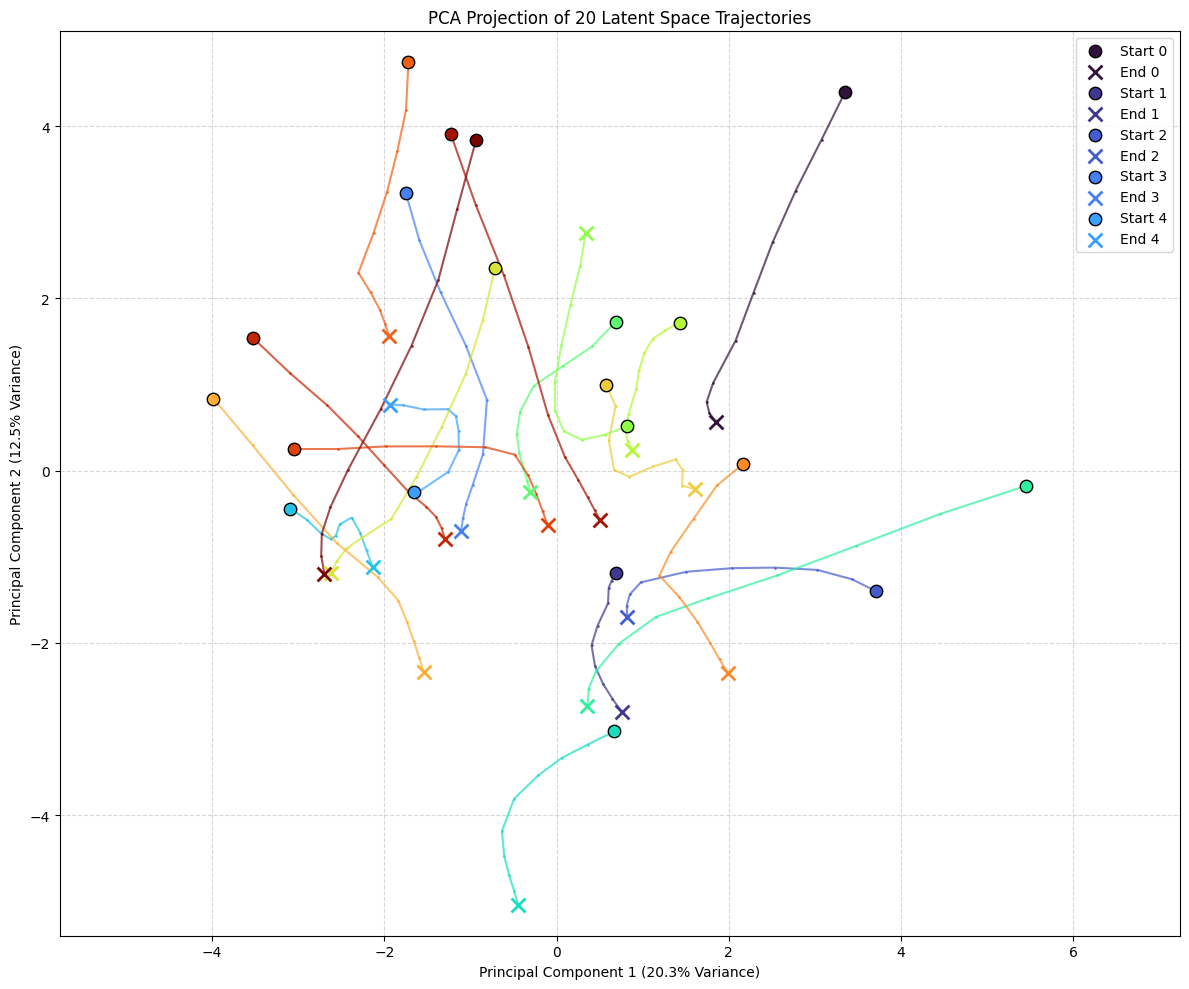

/var/folders/nc/zbqbbkkx08z7v1g3mlf8bdn00000gn/T/ipykernel_5072/3243201122.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(w).to('mps')


Visualization complete.

Example with fewer steps:
Starting trajectory visualization...
Performing PCA for 2D projection...
PCA done. Explained variance: PC1=18.03%, PC2=13.96%
Plotting trajectories...


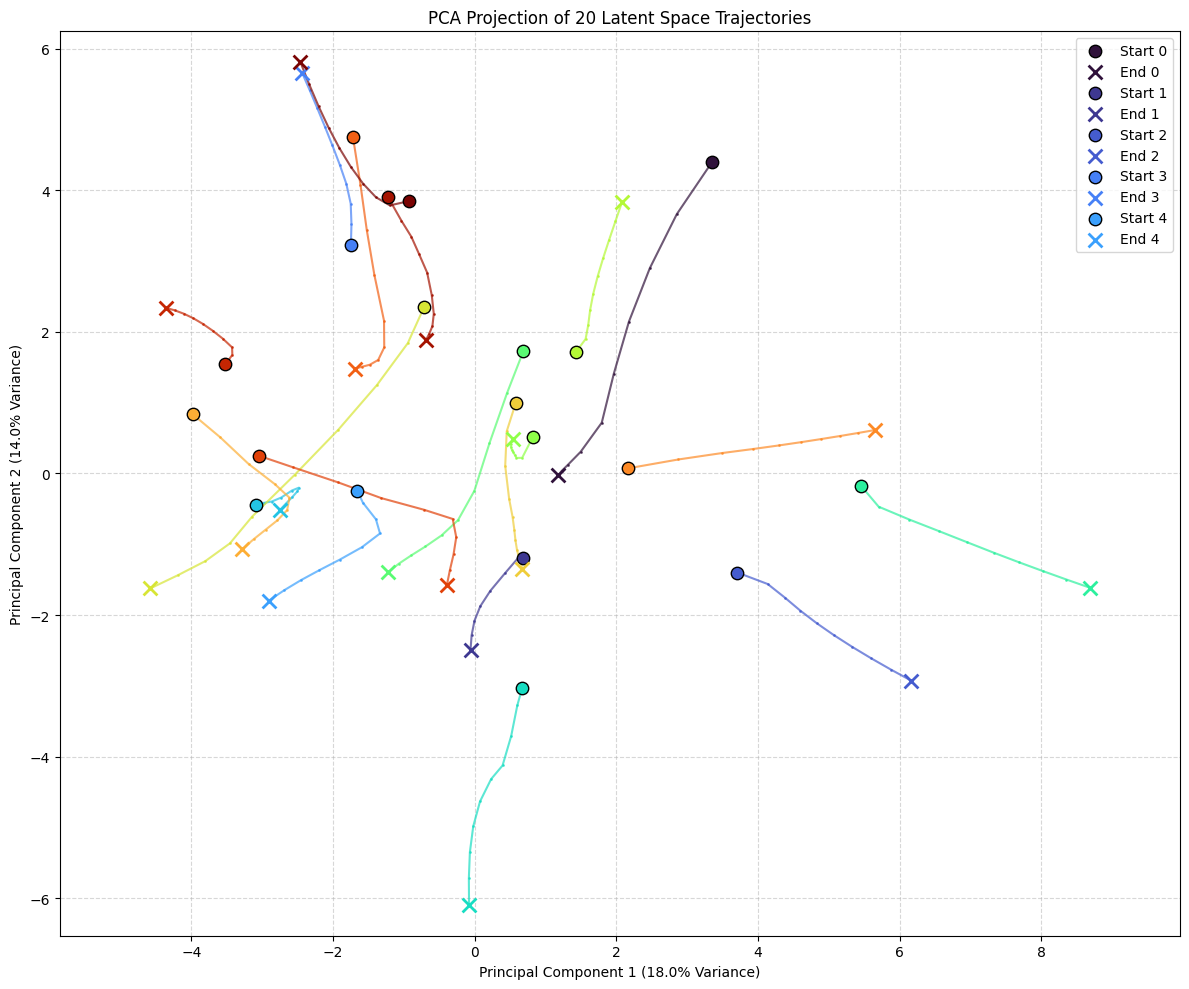

Visualization complete.

Example with only start points:


NameError: name 'sim_rating' is not defined

In [128]:

import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

p = "Peterson valence/latents/"
directions = dict([(m,torch.from_numpy(np.load((p+m+"_direction.npy"))).float().to(device)) for m in ["trustworthy","attractive","smart"]])
t = directions["trustworthy"].to(device)
def plot_trajectories_pca(
    traj_all_tensor: torch.Tensor,
    rating_value: float = None,
    title: str = None,
    num_trajectories_to_label: int = 5,
    figsize: tuple = (12, 10),
    output_filename: str = None # Optional: Save plot to file
    ):
    """
    Projects high-dimensional trajectories onto the first 2 principal components
    using PCA and plots them.

    Args:
        traj_all_tensor: A PyTorch tensor containing the trajectories.
                         Expected shape: [num_steps, batch_size, dim].
        rating_value: The  rating value used to generate trajectories (optional, for title).
        title: Custom title for the plot (optional). Overrides default title.
        num_trajectories_to_label: How many start/end points to label (default: 5).
        figsize: Figure size for the plot (default: (12, 10)).
        output_filename: If provided, saves the plot to this file path instead of showing it.
    """
    print("Starting trajectory visualization...")

    # Ensure tensor is on CPU and convert to NumPy
    if traj_all_tensor.device.type != 'cpu':
        traj_all_np = traj_all_tensor.detach().cpu().numpy()
    else:
        traj_all_np = traj_all_tensor.detach().numpy()

    # --- Dimensionality Reduction (PCA) ---
    print("Performing PCA for 2D projection...")
    num_steps, batch_size, dim_original = traj_all_np.shape
    
    # Handle case with only one step (just points)
    if num_steps <= 1:
        print("Warning: Trajectory has insufficient steps for PCA variance. Plotting points.")
        # If only one point, PCA doesn't make sense in the same way.
        # We can still project if dim > 2, but won't capture 'flow'.
        # For simplicity, let's just plot the points if dim=2, or raise error.
        if dim_original == 2:
             traj_2d = traj_all_np # Already 2D
             explained_variance = [100.0, 0.0] # Placeholder
        else:
            # pca = PCA(n_components=2)
            # Fit PCA just on the starting points
            traj_2d_flat = project_onto_principal_components(torch.tensor(traj_all_np.reshape(-1, dim_original)), comp_grad, comp_traj)#t) # Fit and transform the available points
            traj_2d = traj_2d_flat.reshape(num_steps, batch_size, 2)
            explained_variance = pca.explained_variance_ratio_ * 100
            print(f"PCA done on available Pts. Explained variance: PC1={explained_variance[0]:.2f}%, PC2={explained_variance[1]:.2f}%")

    else: # Standard case with multiple steps
        # Reshape data: Treat all points across all trajectories as samples for PCA
        traj_flat = traj_all_np.reshape(-1, dim_original)

        # Initialize and fit PCA
        pca = PCA(n_components=2)
        try:
             pca.fit(traj_flat)
             # Transform the data to 2D
             traj_2d_flat = project_onto_principal_components(torch.tensor(traj_flat)) # 
             # Reshape back to track individual trajectories
             traj_2d = traj_2d_flat.reshape(num_steps, batch_size, 2)
             explained_variance = pca.explained_variance_ratio_ * 100
             print(f"PCA done. Explained variance: PC1={explained_variance[0]:.2f}%, PC2={explained_variance[1]:.2f}%")
        except Exception as e:
            print(f"Error during PCA: {e}. Data shape: {traj_flat.shape}")
            # Add specific handling for cases like zero variance if needed
            if "contains samples with zero variance" in str(e):
                print("PCA failed possibly due to zero variance in data (e.g., all points are identical). Cannot plot PCA.")
                return      
            else:
                raise e # Reraise other errors
                


    

    # --- Plotting ---
    print("Plotting trajectories...")
    plt.figure(figsize=figsize)

    # Use a color map to distinguish trajectories
    colors = plt.cm.turbo(np.linspace(0, 1, batch_size))

    for i in range(batch_size):
        # Plot the trajectory line (avoid plotting if only 1 step)
        if num_steps > 1:
            plt.plot(
                traj_2d[:, i, 0], # x-coordinates (PC1) for trajectory i
                traj_2d[:, i, 1], # y-coordinates (PC2) for trajectory i
                marker='.',        # Optional: mark each computed step
                markersize=2,
                linestyle='-',
                linewidth=1.5,
                color=colors[i],
                alpha=0.7,
                # label=f'Traj {i}' # Labeling can clutter if many trajectories
            )
            
        # Mark the start point
        plt.scatter(
            traj_2d[0, i, 0], traj_2d[0, i, 1],
            marker='o',
            s=80,           # Size of the marker
            color=colors[i],
            edgecolors='black', # Black edge for visibility
            linewidth=1,
            zorder=5,       # Draw on top
            label=f'Start {i}' if i < num_trajectories_to_label else None # Label first few starts
        )
        # Mark the end point (only if more than one step)
        if num_steps > 1:
            plt.scatter(
                traj_2d[-1, i, 0], traj_2d[-1, i, 1],
                marker='x',
                s=100,          # Size of the marker
                color=colors[i],
                linewidth=2,
                zorder=5,       # Draw on top
                label=f'End {i}' if i < num_trajectories_to_label else None # Label first few ends
            )

    # --- Final Plot Adjustments ---
    if title is None:
        base_title = f'PCA Projection of {batch_size} Latent Space Trajectories'
        if rating_value is not None:
             plot_title = base_title + f' (Rating={rating_value:.2f})'
        else:
             plot_title = base_title
    else:
        plot_title = title
    plt.title(plot_title)
    
    if 'explained_variance' in locals(): # Check if PCA was successful
         plt.xlabel(f'Principal Component 1 ({explained_variance[0]:.1f}% Variance)')
         plt.ylabel(f'Principal Component 2 ({explained_variance[1]:.1f}% Variance)')
    else:
        plt.xlabel('Dimension 1') # Fallback labels if PCA failed or dim=2
        plt.ylabel('Dimension 2')
        
    plt.grid(True, linestyle='--', alpha=0.5)
    if num_trajectories_to_label > 0:
        plt.legend() # Show legend if labels were added
    plt.axis('equal') # Enforce equal aspect ratio for better shape perception
    plt.tight_layout() # Adjust layout

    # --- Show or Save ---
    if output_filename:
        plt.savefig(output_filename, dpi=300)
        print(f"Plot saved to {output_filename}")
    else:
        plt.show()

    print("Visualization complete.")


# ==========================================================
# Example Usage (assuming you have run your ODE code)
# ==========================================================
if __name__ == '__main__':
    # --- This section simulates obtaining the trajectory tensor ---
    # --- Replace this with your actual trajectory computation ---
    print("Simulating trajectory computation for example usage...")
    _SIM_DEVICE = torch.device("cuda" if torch.cuda.is_available() else "mps")
    _SIM_DIM = 512
    _SIM_NUM_STEPS = 10
    _SBATCH_SIZE = 10
    

    # --- Now, cal
    traj_all_simulated = traj_all
    print(f"Simulated trajectory tensor shape: {traj_all_simulated.shape}")
    comp_traj = (traj_all[0]-traj_all[-1]).mean(dim=0).squeeze()
    print(comp_traj)
    # --- Now, call the plotting function ---
    plot_trajectories_pca(
        traj_all_tensor=traj_all,
        # rating_value=sim_rating,
        # output_filename="trajectory_plot.png" # Uncomment to save instead of show
    )

    # --- Example with fewer points ---
    print("\nExample with fewer steps:")
    plot_trajectories_pca(
        traj_all_tensor = traj_all2, # Take every 10th step
        # rating_value=sim_rating,
        # title = f"PCA Projection (Sampled Steps, Rating={sim_rating:.2f})"
    )

    # --- Example with only start points ---
    print("\nExample with only start points:")
    plot_trajectories_pca(
        traj_all_tensor = traj_all_simulated[[0], :, :], # Select only the first step
        # rating_value=sim_rating,
        title = f"PCA Projection (Start Points Only, Rating={sim_rating:.2f})"
    )
    

In [ ]:
x = torch.load("/Users/adamsobieszek/PycharmProjects/psychGAN/trustworthy_high_male_agebin_12_part_23.pt")
x = x['w'].float().to(device)[:40]

In [ ]:
torch.save(dataset, "new_trust")
i_w

In [ ]:
distance = torch.linalg.norm(w_avg.view(1,1,-1) - traj, dim=-1).cpu()#.view(-1)
for x,y in zip(np.array(np.repeat([*range(50)], 200)).reshape(200,50), distance.reshape(200,50)):
  plt.plot(x,y)


In [ ]:
# !gdown 12FwgQuna8Sh8EnGeTrlD99K7zk9E99zn
# !gdown 12Grbl3YsKmOfC0QXwPpcdaaCDlfq41Y5
p = "Peterson valence/latents/"
# m = "flow_models/"
# val = "Zapasowy5 validation/"
directions = dict([(m,torch.from_numpy(np.load((p+m+"_direction.npy")))) for m in ["trustworthy","attractive","smart"]])
# os.makedirs(val, exist_ok=True)
peterson_w = torch.from_numpy(np.load(f"{p}w_original.npy")).to(torch.float32).to(device)#.unsqueeze(1).repeat((1,18,1))
n_to_delete = [47, 30, 26, 21, 14, 10, 11, 5, 4]
peterson_indices = np.load(f"{p}indices.npy")

In [ ]:
peterson_norm = (peterson_w - w_avg.unsqueeze(0)).norm(dim=-1).mean()
ideal_norm = (get_w(500,.7)[:,0] - w_avg.unsqueeze(0)).norm(dim=-1).mean()
ideal_norm

In [ ]:
normed_peterson_w = w_avg.unsqueeze(0) + ideal_norm/peterson_norm*(peterson_w - w_avg.unsqueeze(0))
norm = lambda w: w_avg.unsqueeze(0) + ideal_norm/peterson_norm*(w - w_avg.unsqueeze(0))
denorm = lambda w: w_avg.unsqueeze(0) + peterson_norm/ideal_norm*(w - w_avg.unsqueeze(0))
(denorm(normed_peterson_w) - w_avg.unsqueeze(0)).norm(dim=-1).mean()

In [ ]:

def manip_batch(face_w, node, max=10, steps=200):
    with torch.no_grad():
        traj = node.trajectory(
            face_w,
            t_span=torch.linspace(0, max, steps),
        )
        return traj

_flow = RatingODE(flow,trust_model)
node = NeuralODE(
  torch_wrapper(_flow), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4
)

_flow = RatingODE(flow,trust_model,reverse=True)
reverse_node = NeuralODE(
  torch_wrapper(_flow), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4
)

face_w = peterson_w[10:20]
face_w = manip_batch(face_w, node)

Setting up model and ODE solver...
Model and ODE solver ready.
Sampling 3 starting points...
Computing trajectories from t=0.0 to t=5.0...


KeyboardInterrupt: 

In [ ]:
df.smart.std()*1.5
def manip_batch2(face_w, flow, max=0.2, steps=150, direction=1):
    with torch.no_grad():
        flow.eval()
        _flow = RatingODE(flow, trust_model, direction)
        node = NeuralODE(
            torch_wrapper(_flow), solver="dopri5", sensitivity="adjoint", atol=1e-4, rtol=1e-4
        )
        traj = node.trajectory(
            face_w,
            t_span=torch.linspace(0, max, steps),
        )
        return traj.cpu(), _flow.history


def flow_w(w, flow, steps=250):
    w1,low = manip_batch2(w, flow, max=0.1, steps=100, direction=-1)
    w2,high = manip_batch2(w, flow, max=0.45, steps=300, direction=1)
    # print(high[-1]-low[-1])
    return torch.cat([torch.flip(w1,dims=(0,)),w2])#,torch.stack(low[::-1]+high),high[-1]-low[-1]


In [ ]:
def find_closest_indices(tensor, targets):
    """
    Find indices of values closest to target values for each row in tensor

    Args:
        tensor (torch.Tensor): Input tensor of shape (n_rows, n_cols)
        targets (torch.Tensor): Target values of shape (n_rows, 1)

    Returns:
        torch.Tensor: Indices of closest values for each row
    """
    # Ensure inputs are tensors
    if not isinstance(tensor, torch.Tensor):
        tensor = torch.tensor(tensor)
    if not isinstance(targets, torch.Tensor):
        targets = torch.tensor(targets)

    # Expand targets to match tensor shape for broadcasting
    targets = targets.expand(-1, tensor.shape[1])

    # Calculate absolute differences
    differences = torch.abs(tensor - targets)

    # Find indices of minimum values along each row
    closest_indices = torch.argmin(differences, dim=1)

    return closest_indices

@torch.no_grad()
def pick_ws(w):
  history = []
  # for i in range(len(w)):
  #   w[i] = norm(w[i])
  for row in range(len(w)):
    history.append(trust_model(w[row], "mean"))

  history = torch.hstack(history)
  r =history
  target_values = torch.zeros(10,1)+0.5

  low = r[:,:1]+0.002
  high = r[:,-1:]-0.002
  values = []
  for i in [0.,0.25,0.5,0.75,1.]:
    values+=[low*(1-i)+high*i]


  ns= []
  for v in values:
    n = find_closest_indices(r, v).cpu()
    ns+=[(n.view(-1,1),torch.arange(len(r)).view(-1,1))]

  return [w[n[0],n[1]] for n in ns],[r.T[n] for n in ns]

def save_ws(orig_w, flow, save=True):
  w = flow_w(orig_w, flow) #w,r.T,ns#
  w,r = pick_ws(w)
  d = dim if dim!='trust' else 'trustworthy'
  if save:
    os.makedirs(val.replace("validation",f"validation {d}"), exist_ok=True)
    os.makedirs(val.replace("validation",f"validation {d} images"), exist_ok=True)
    for i, j in enumerate(range(len(orig_w))):
      for level in range(5):
        torch.save(w[level][i], f"{val.replace('validation',f'validation {d}')}{100+i}_{d}_{level}_our.pt")
  return w,r

# w,r = get_ws(peterson_w, flow)

ideal_norm = (get_w(500,1.)[:,0] - w_avg.unsqueeze(0)).norm(dim=-1).mean()
normed_peterson_w = w_avg.unsqueeze(0) + ideal_norm/peterson_norm*(peterson_w - w_avg.unsqueeze(0))
norm = lambda w: w_avg.unsqueeze(0) + ideal_norm/peterson_norm*(w - w_avg.unsqueeze(0))




In [ ]:
def get_w(n,truncation_psi=.6):
  with torch.no_grad():
    all_z = torch.randn([n*20, 512], device=device)
    all_w = G.mapping(all_z, None, truncation_psi=truncation_psi)
    age = control_models[2](all_w[:,0],"mean")>23
    all_w = all_w[age.view(-1)]
    gender = control_models[1](all_w[:,0],"mean")
    f = all_w[gender.view(-1)>58]
    rating = trust_model(f[:,0],"mean")
    f = f[rating.view(-1)<rating.mean()][:n//2]

    m = all_w[gender.view(-1)<42]
    rating = trust_model(m[:,0],"mean")
    m = m[rating.view(-1)<rating.mean()][:n//2]
    return torch.cat([f,m])

In [ ]:

def analyze_solution_sensitivity(flow, model, w_test, t_final=10.0, timestep_counts=[10, 20, 40, 80, 160]):
    """Analyze how trajectory varies with time step size by comparing to reference solution"""
    results = []

    # Generate reference solution with very fine time step
    _flow = RatingODE(flow, model)
    node_ref = NeuralODE(
        torch_wrapper(_flow),
        solver="dopri5",
        sensitivity="adjoint",
        atol=1e-6,  # Tighter tolerances for reference
        rtol=1e-6
    )

    with torch.no_grad():
        # Reference trajectory with 1000 points
        t_ref = torch.linspace(0, t_final, 400)
        ref_traj = node_ref.trajectory(w_test, t_span=t_ref)

        # Test different time step sizes
        for n_steps in timestep_counts:
            node = NeuralODE(
                torch_wrapper(_flow),
                solver="dopri5",
                sensitivity="adjoint",
                atol=1e-4,
                rtol=1e-4
            )

            t_eval = torch.linspace(0, t_final, n_steps)
            traj = node.trajectory(w_test, t_span=t_eval)

            # Interpolate reference trajectory to match evaluation points
            ref_interp = torch.stack([ref_traj[int(t/t_final * 399)] for t in t_eval])

            # Calculate L2 error at each timestep
            errors = torch.norm(traj - ref_interp, dim=2).mean(dim=1)

            results.append({
                'timesteps': n_steps,
                'dt': t_final/n_steps,
                'errors': errors.cpu().numpy()
            })

    return results

# Plot results
def plot_sensitivity_results(results, t_final=10.0):
    plt.figure(figsize=(15, 5))

    # Plot error evolution over time for each dt
    plt.subplot(121)
    for r in results:
        t = np.linspace(0, t_final, r['timesteps'])
        plt.plot(t, r['errors'], label=f'dt={r["dt"]:.3f}')
    plt.xlabel('Time')
    plt.ylabel('L2 Error')
    plt.legend()
    plt.title('Error Evolution Over Time')
    plt.grid(True)

    # Plot final error vs dt
    plt.subplot(122)
    dts = [r['dt'] for r in results]
    final_errors = [r['errors'][-1] for r in results]
    plt.loglog(dts, final_errors, 'o-')
    plt.xlabel('Time Step (dt)')
    plt.ylabel('Final L2 Error')
    plt.title('Final Error vs Time Step Size')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run analysis
results = analyze_solution_sensitivity(flow, model, sample_w(20,1))
plot_sensitivity_results(results)


In [ ]:
def get_models(dim):
  flow = VectorFieldTransformer(
      dim=512,
      depth=8,
      heads=4,
      dim_head=64,
      num_registers=32,
      dropout=0.1
  ).to(device)
  flow.load_state_dict(torch.load(f"{m}{dim}_8-4.pt"))
  flow.eval()
  trust_model.load_state_dict(torch.load(f"{m}{dim}_flow.pt"))
  trust_model.eval()
  return flow, trust_model

# dim = "attractive"
# flow, trust_model = get_models(dim)
# _ = save_ws(get_w(20)[:,0], flow)
# # dim = "smart"
# # flow, trust_model = get_models(dim)
# # _ = save_ws(get_w(20)[:,0], flow)
# dim = "trust"
# flow, trust_model = get_models(dim)
# _ = save_ws(get_w(20)[:,0], flow)


In [ ]:
def save_peterson_ws(p,d):
  p = p.replace("validation", f"validation {d}")
  files = [m.replace('jpg','pt') for m in os.listdir(p.replace(f'{d}', f'{d} images')) if d in m and "0_our" in m]

  coords = [ torch.load(p+m) for m in files]
  files = [m.replace("our","peterson") for m in files]
  for c,f in zip(coords,files):
    for i in range(1,5):
      w_direction = directions[d].clone()
      g1 = grad(c.reshape(1,-1), control_models[2], "mean")
      g2 = grad(c.reshape(1,-1), control_models[1], "mean")
      w_direction = add_controlled_dimensions(w_direction, [g1,g2])

      torch.save(c-i/1.9*w_direction.cpu(),p+f.replace("_0_pet",f"_{i}_pet"))

def del_coords(p,d):
  p = p.replace("validation", f"validation {d}")
  files = set([m.replace('jpg','pt') for m in os.listdir(p.replace(f'{d}', f'{d} images')) if d in m])
  all_files = set([m for m in os.listdir(p) if d in m])
  del_files = all_files-files
  for f in del_files:
    os.remove(p+f)

val = "content/drive/Shareddrives/[PsychGAN]/Final final twarze do badania/Zapasowy4 validation/"
# save_peterson_ws(val, "attractive")
# save_peterson_ws(val, "smart")
save_peterson_ws(val, "trustworthy")
del_coords(val, "attractive")
# del_coords(val, "smart")
del_coords(val, "trustworthy")

In [ ]:
face = 0
plot(torch.cat([ww[face:face+1] for ww in w]).reshape(-1,512), 1)
face = 1
plot(torch.cat([ww[face:face+1] for ww in w]).reshape(-1,512), 1)
face = 2
plot(torch.cat([ww[face:face+1] for ww in w]).reshape(-1,512), 1)

In [ ]:

# !zip -r "content/drive/Shareddrives/[PsychGAN]/Final final twarze do badania/attractive" "content/drive/Shareddrives/[PsychGAN]/Final final twarze do badania/Final validation attractive"

In [ ]:
import torch
import os
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize
import torchvision.transforms.functional as TF
from pathlib import Path
from typing import List, Tuple, Iterator

class LatentFileDataset(Dataset):
    """Dataset for loading latent vectors from PT files"""
    def __init__(self, folder_path: str):
        self.folder_path = folder_path
        self.file_list = [f for f in os.listdir(folder_path) if f.endswith('.pt')]

    def __len__(self) -> int:
        return len(self.file_list)

    def __getitem__(self, idx: int) -> Tuple[torch.Tensor, str]:
        filename = self.file_list[idx]
        file_path = os.path.join(self.folder_path, filename)
        latent = torch.load(file_path)
        return latent, filename

def process_latent_files(
    folder_path: str,
    batch_size: int,
    device: torch.device,
    generator: torch.nn.Module
) -> Iterator[Tuple[List[torch.Tensor], List[str]]]:
    """
    Process PT files in batches while maintaining filenames

    Args:
        folder_path: Path to folder containing PT files
        batch_size: Number of files to process at once
        device: Torch device to use
        generator: StyleGAN generator model

    Yields:
        Tuple of (generated images, filenames)
    """
    # Setup dataset and dataloader
    dataset = LatentFileDataset(folder_path)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Setup transforms
    transform = Compose([
        Resize(1024),
        lambda x: torch.clamp((x + 1) / 2, min=0, max=1)
    ])

    def process_latent(w: torch.Tensor) -> torch.Tensor:
        """Transform single latent vector to required format"""
        return w.to(device).unsqueeze(1).repeat(1, 18, 1)

    # Process batches
    for batch_latents, batch_filenames in dataloader:
        # Process each latent in the batch
        processed_latents = torch.cat([
            process_latent(latent) for latent in batch_latents
        ], dim=0)

        # Generate images
        with torch.no_grad():
            generated = generator.synthesis(processed_latents).cpu()
            images = [TF.to_pil_image(transform(img)) for img in generated]

        yield images, batch_filenames

def generate_and_plot(
    folder_path: str,
    batch_size: int,
    device: torch.device,
    generator: torch.nn.Module,
    save_path: str = None
) -> None:
    """
    Generate and optionally save images from latent vectors

    Args:
        folder_path: Path to folder containing PT files
        batch_size: Number of files to process at once
        device: Torch device to use
        generator: StyleGAN generator model
        save_path: Optional path to save generated images
    """
    processor = process_latent_files(folder_path, batch_size, device, generator)

    for batch_idx, (images, filenames) in enumerate(processor):
        # Here you can either save the images or display them
        if save_path:
            save_dir = Path(save_path)
            save_dir.mkdir(exist_ok=True)

            for img, filename in zip(images, filenames):
                output_path = save_dir / f"{Path(filename).stem}.jpg"
                img.save(output_path)

        # If you want to plot them, you can call your plot function here
        # plot(images, rows=rows, labels=filenames)

        print(f"Processed batch {batch_idx + 1}: {', '.join(filenames)}")


# Then use the function
for d in ["smart","attractive","trustworthy"]:
  try:
    p = val.replace("validation",f"validation {d}")
    generate_and_plot(
        folder_path=p,
        batch_size=8,
        device=device,

        
        generator=G,
        save_path=p.replace(f"{d}",f"{d} images"))
  except:
    print(f"{d} failed")

AttributeError: partially initialized module 'torchvision' has no attribute 'extension' (most likely due to a circular import)

In [ ]:
#@title psychgan.utils
import PIL.Image
from PIL import Image, ImageDraw
from math import ceil
from io import BytesIO
import IPython.display

def lfy(x):
  """ Listify function, 'if its a single element make it a list of len 1
      I use it in other functions to be able to pass either an argument or a list of arguments"""
  if isinstance(x,list): return x
  if isinstance(x,pd.DataFrame) or isinstance(x,pd.Series): return list(x.values)
  return [x]


def imshow(a, format='png', jpeg_fallback=True):
  a = np.asarray(a, dtype=np.uint8)
  str_file = BytesIO()
  PIL.Image.fromarray(a).save(str_file, format)
  im_data = str_file.getvalue()
  try:

    disp = IPython.display.display(IPython.display.Image(im_data))
  except IOError:
    if jpeg_fallback and format != 'jpeg':
      print ('Warning: image was too large to display in format "{}"; '
             'trying jpeg instead.').format(format)
      return imshow(a, format='jpeg')
    else:
      raise
  return disp
def createImageGrid(images, scale=1, rows=1):
   w,h = images[0].size
   w = int(w*scale)
   h = int(h*scale)
   height = rows*h
   cols = ceil(len(images) / rows)
   width = cols*w
   canvas = PIL.Image.new('RGBA', (width,height), 'white')
   for i,img in enumerate(images):
     img = img.resize((w,h))
     canvas.paste(img, (w*(i % cols), h*(i // cols)))
   return canvas

def show_four_results(result_dir="/validation_stimuli",start_no=0, coeff = 1.0):
    images =[]
    for n in range(4):
        images+=[PIL.Image.open(result_dir+'/images/'+str(n+start_no)+sufix) for sufix in ['neg'+str(coeff)+'.png','neu.png','pos'+str(coeff)+'.png']]

def dot(x,y):
  if type(x) == str:    x = np.load(x)
  if type(y) == str:  y = np.load(y)
  if len(x.shape)>1:
    return np.dot(x[1]/np.linalg.norm(x[1]),y[1]/np.linalg.norm(y[1]))
  else:
    return np.dot(x/np.linalg.norm(x),y/np.linalg.norm(y))

def read(target, passthrough = True):
  """Transform an str of coordinate path, or np.array of shape (512,) to np.array (18,512)"""
  if target is None: return 0
  if isinstance(target,str):
    try:
      target = np.load(target)
    except:
      if passthrough: return target
      else: return
  if list(target.shape) == [1,18,512]:
    return target
  if target.shape[0] in [1,512]:
    try:
      target = np.tile(target,(18,1))
    except:
      target = torch.tile(target,(18,1))
    return target
  if target.shape[0]==18 or passthrough:
    return target

def show(target, add = None, sub = False, plot = True, grid=True, rows=1):
  """Display or get PIL.Image of faces.
  Args:
    target :  string with location of coordinates or image, or a np.array with shape (512,) or (18,512)
              or list thereof

  """
  tf = Compose([
    Resize(1024),
    lambda x: torch.clamp((x+1)/2,min=0,max=1),
    ])

  target, add = lfy(target), lfy(add)

  # Separate inputs into coordinates to generate and paths to images to load
  to_generate = [read(t,False) for t in target if read(t,False) is not None]

  if not add[0] is None:
    if len(add)==len(target):
      to_generate_add = [t+read(a) for t,a in zip(target,add)]
      to_generate_sub = [t-read(a) for t,a in zip(target,add)]
    else:
      to_generate_add = [t+read(add[0]) for t in target]
      to_generate_sub = [t-read(add[0]) for t in target]
    if sub:
      to_generate = [m for row in zip(to_generate_sub,to_generate,to_generate_add) for m in row]
    else:
      to_generate = [m for row in zip(to_generate,to_generate_add) for m in row]


  other = [PIL.Image.open(t) for t in target if isinstance(t,str) and not '.npy' in t]
  for im in target:
    try:
      other+=[TF.to_pil_image(tf(im.cpu()))]
    except:
      pass

  # To image
  if len(to_generate)>0:
    with torch.no_grad():
      try:
        face_w = torch.tensor(to_generate,device=device)
      except:
        if len(to_generate)==1: face_w = torch.stack(to_generate).to(device)
        else: raise Exception("Error while converting list of coordinates to torch.Tensor")
      images = G.synthesis(face_w.view(-1,18,512)).cpu()
      images_pil = [TF.to_pil_image(tf(im)) for im in images]
  else: images_pil = []
  images_pil += [(t) for t in other]

  if plot:
    if grid and len(images_pil)>1:
      cols = len(images_pil)//rows+1
      width = 12/np.sqrt(len(images_pil))
      plt.subplots(figsize=(width*rows,width*cols))
      plt.xticks([])
      plt.yticks([])
      plt.imshow(createImageGrid(images_pil,rows = rows))
      plt.show()
    else:
      for im in images_pil:
        plt.subplots(figsize=(9,9))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(im)
        plt.show()
  else:
    if grid:
      return createImageGrid(createImageGrid(images_pil,rows = rows))
    else:
      return images_pil

# try:
#   w_avg = G.mapping.w_avg.cpu().numpy()
# except:
#   pass
# show(all_x, rows =1)

In [ ]:



def plot(w):
  transform = Compose([
      Resize(512),
      lambda x: torch.clamp((x + 1) / 2, min=0, max=1)
  ])
  rows = 2

  with torch.no_grad():
    images = G.synthesis(w).cpu()
    images_pil = [TF.to_pil_image(transform(im)) for im in images]
    cols = len(images_pil)//rows+1
    width = 15/np.sqrt(cols)
    plt.subplots(figsize=(width*rows,width*cols))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(createImageGrid(images_pil,rows = rows))
    plt.show()
#
# plot(denorm(init_w).unsqueeze(1).repeat((1,18,1)))
# plot(denorm(last_w).unsqueeze(1).repeat((1,18,1)))

# transformers

# Vizualize

torch.Size([400, 512])


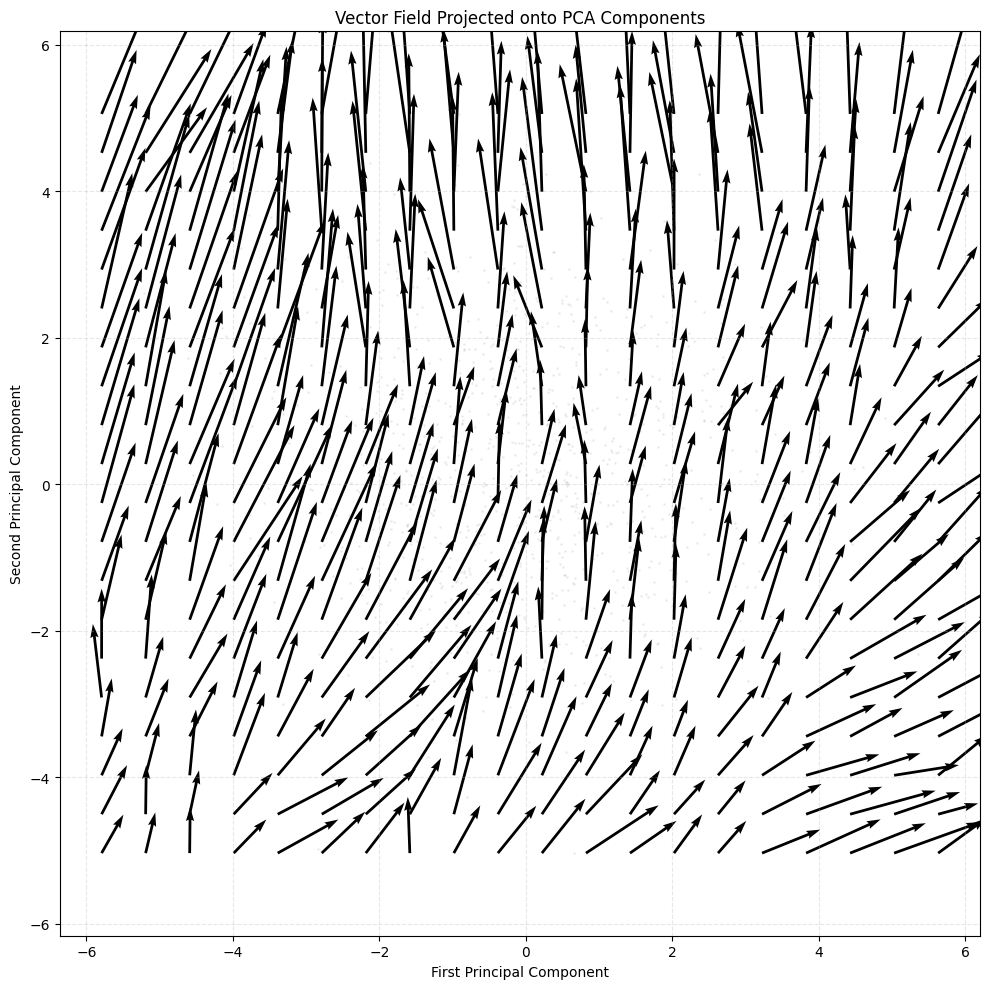

torch.Size([400, 512])


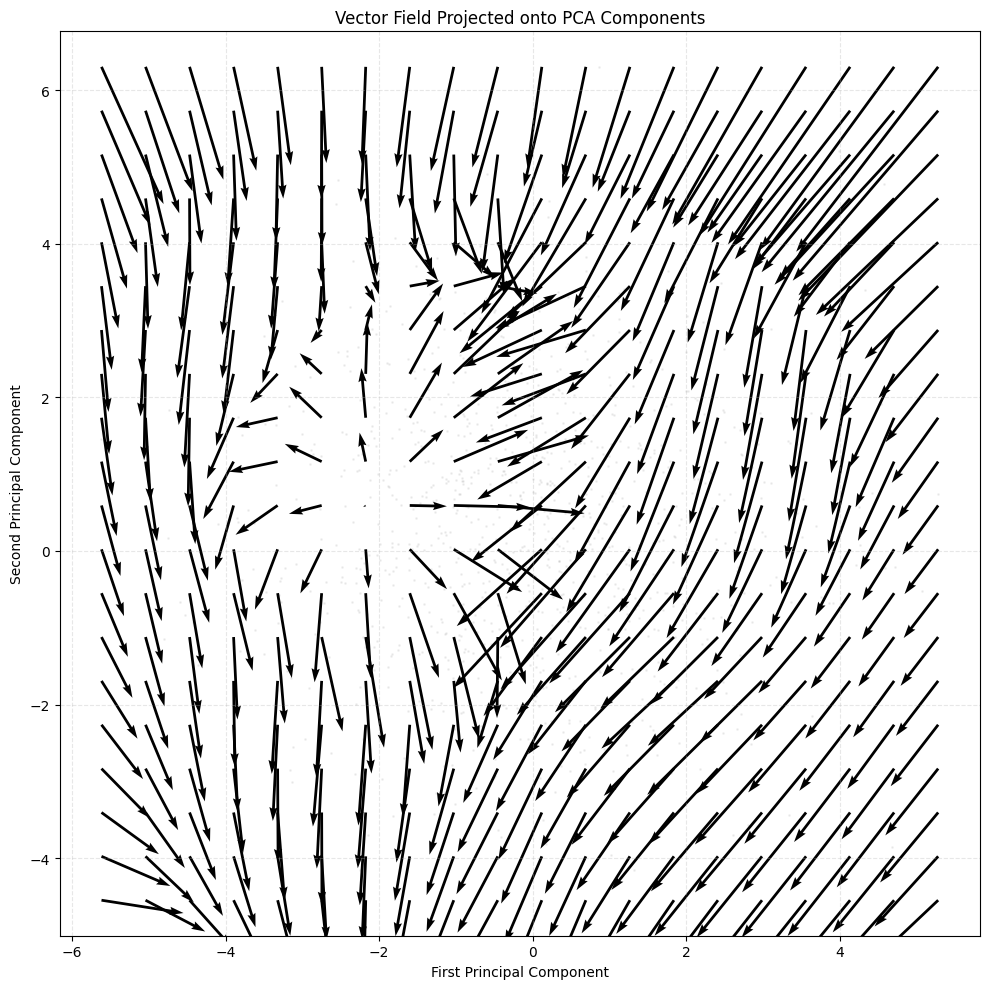

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA

def plot_vector_field_pca(flow_model, pca_components, w_samples, grid_size=20, scale=1.0, device='mps'):
    """
    Plot the vector field from a flow model projected onto PCA components.

    Args:
        flow_model: Model that outputs vector field (should have a forward method)
        pca_components: Tuple of (comp1, comp2) as torch tensors
        w_samples: Tensor of w vectors used for establishing plot bounds
        grid_size: Number of points per dimension in the grid
        scale: Scaling factor for vector lengths
        device: Device to run computations on
    """
    comp1, comp2 = pca_components

    # Project samples onto PCA components to determine plot bounds
    projected_samples = project_onto_principal_components(w_samples, comp1, comp2)
    x_min, x_max = projected_samples[:, 0].min().item(), projected_samples[:, 0].max().item()
    y_min, y_max = projected_samples[:, 1].min().item(), projected_samples[:, 1].max().item()

    # Create grid
    x = np.linspace(x_min, x_max, grid_size)
    y = np.linspace(y_min, y_max, grid_size)
    X, Y = np.meshgrid(x, y)

    # Convert grid points back to original space
    grid_points = torch.tensor(np.stack([X.flatten(), Y.flatten()], axis=1),
                             dtype=torch.float32,
                             device=device)

    # Reconstruct points in original space
    reconstruction_matrix = torch.stack([comp1, comp2], dim=1)
    original_space_points = torch.matmul(grid_points, reconstruction_matrix.T)

    # Get vector field from model
    vectors = flow_model(original_space_points).detach()
    print(vectors.shape)

    # Project vectors onto PCA components
    projected_vectors = project_onto_principal_components(vectors, comp1, comp2)

    # Reshape for plotting
    U = projected_vectors[:, 0].reshape(grid_size, grid_size).cpu().numpy()
    V = projected_vectors[:, 1].reshape(grid_size, grid_size).cpu().numpy()
    norm = np.sqrt(U**2 + V**2).mean()
    U = U / norm * scale/10
    V = V / norm * scale/10
    # Create plot
    plt.figure(figsize=(10, 10))

    # Plot sample points
    plt.scatter(projected_samples[:, 0].cpu(),
               projected_samples[:, 1].cpu(),
               c='gray', alpha=0.1, s=1)

    # Plot vector field
    plt.quiver(X, Y, U, V, scale=1/scale, width=0.003)

    # Add labels and title
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Vector Field Projected onto PCA Components')

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.3)

    # Ensure equal aspect ratio
    plt.axis('equal')
    plt.tight_layout()

    return plt.gcf()


# Assuming you have:
# - flow_model: your trained flow model
# - w_samples: tensor of w vectors
# - comp1, comp2: PCA components as torch tensors
# - device: 'cuda' or 'cpu'

fig = plot_vector_field_pca(
    flow_model=lambda x: grad(x,model),
    pca_components=(comp1, comp2),
    w_samples=sample_w(1000),
    grid_size=20,
    scale=1.0,
    device=device
)
plt.show()

fig = plot_vector_field_pca(
    flow_model=_flow,
    pca_components=(comp1, comp2),
    w_samples=sample_w(1000),
    grid_size=20,
    scale=1.0,
    device=device
)
plt.show()

In [ ]:

projected_samples = project_onto_principal_components(sample_w(1000), comp1, comp2)
plt.scatter(projected_samples[:,0].cpu(),projected_samples[:,1].cpu())